
... ***CURRENTLY UNDER DEVELOPMENT*** ...


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op
from datetime import datetime

# pip
import numpy as np
import xarray as xr

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.waves import GetDistribution_gow, GetDistribution_ws



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/nico/Projects/TESLA-kit/TeslaKit/data'
db = Database(p_data)

# set site
db.SetSite('ROI')


# wave families sectors
fams_sectors = [(210, 22.5), (22.5, 135)]



## CSIRO SPEC + WAVESPECTRA vs GOW

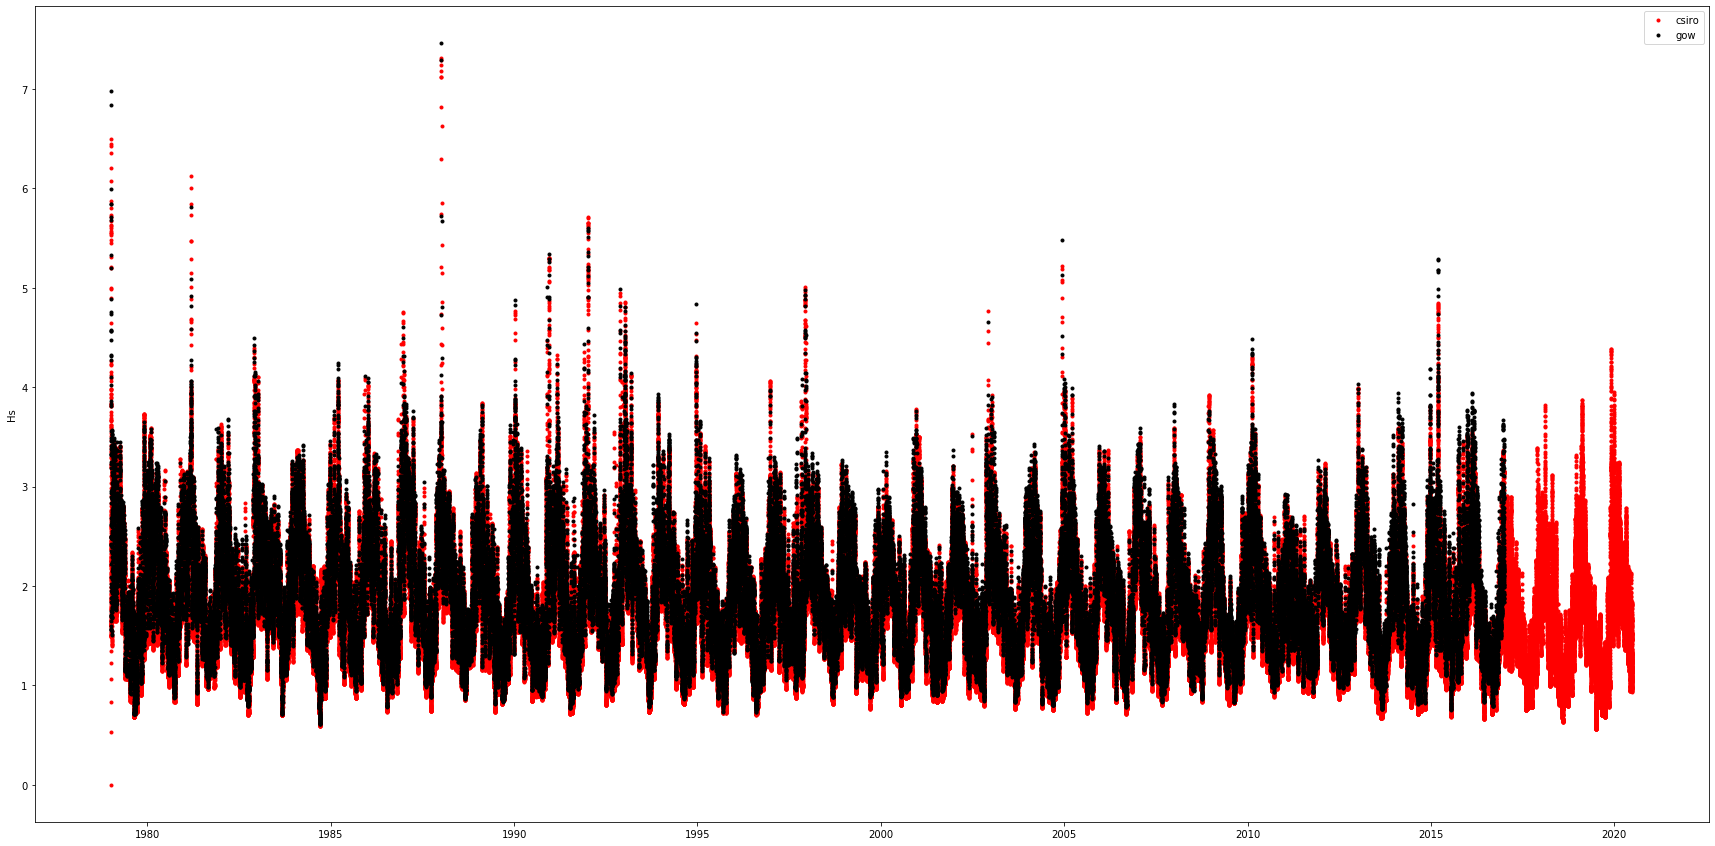

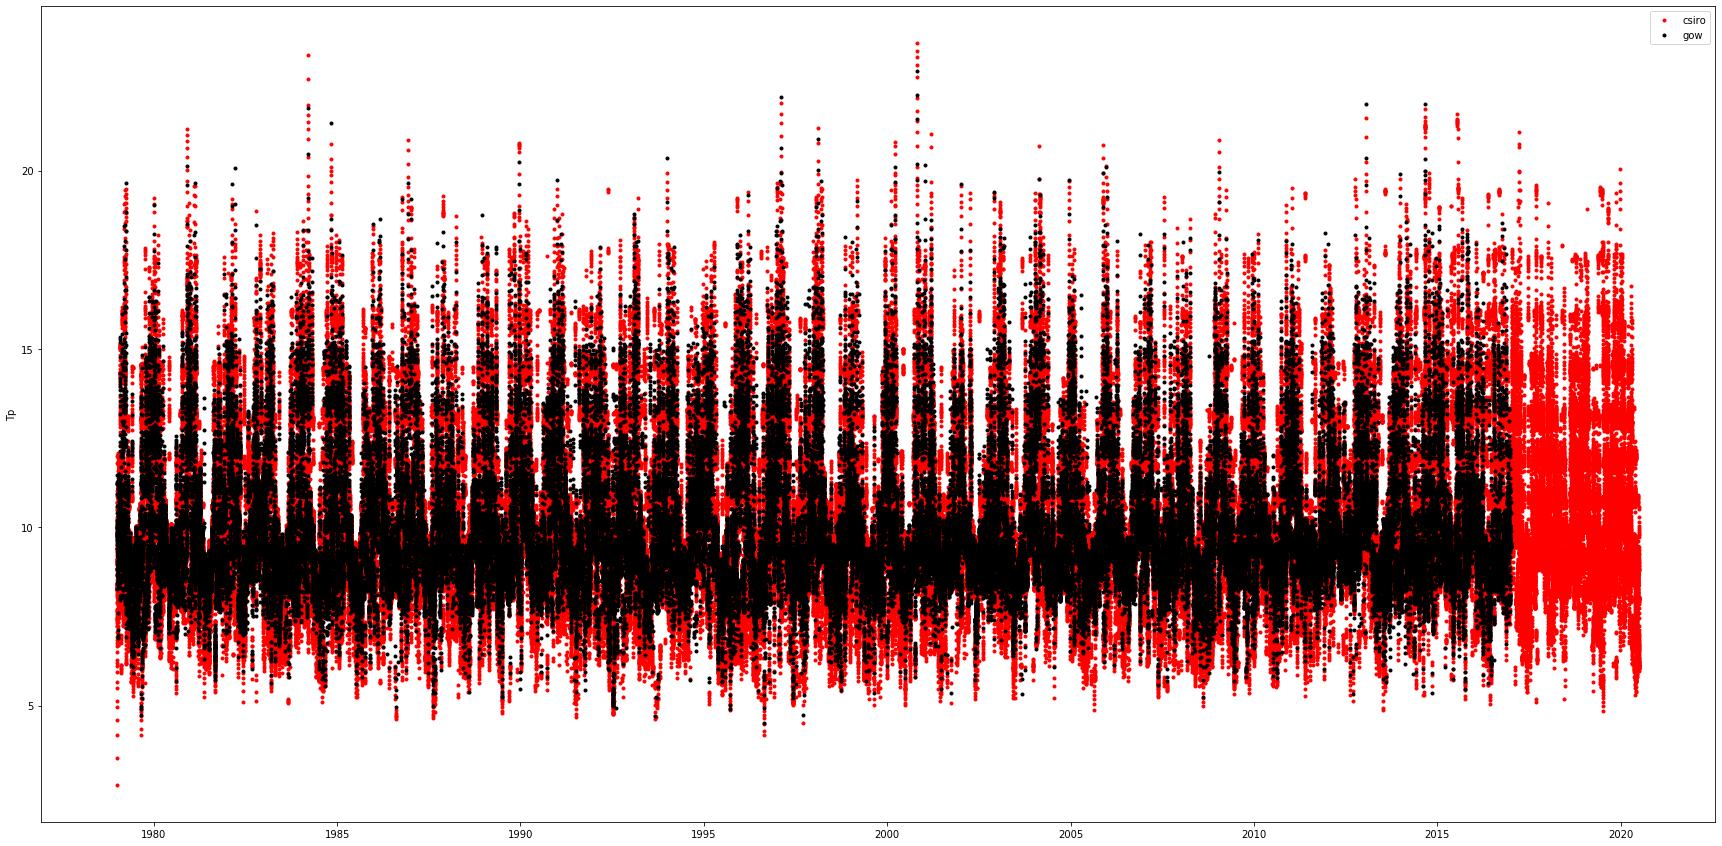

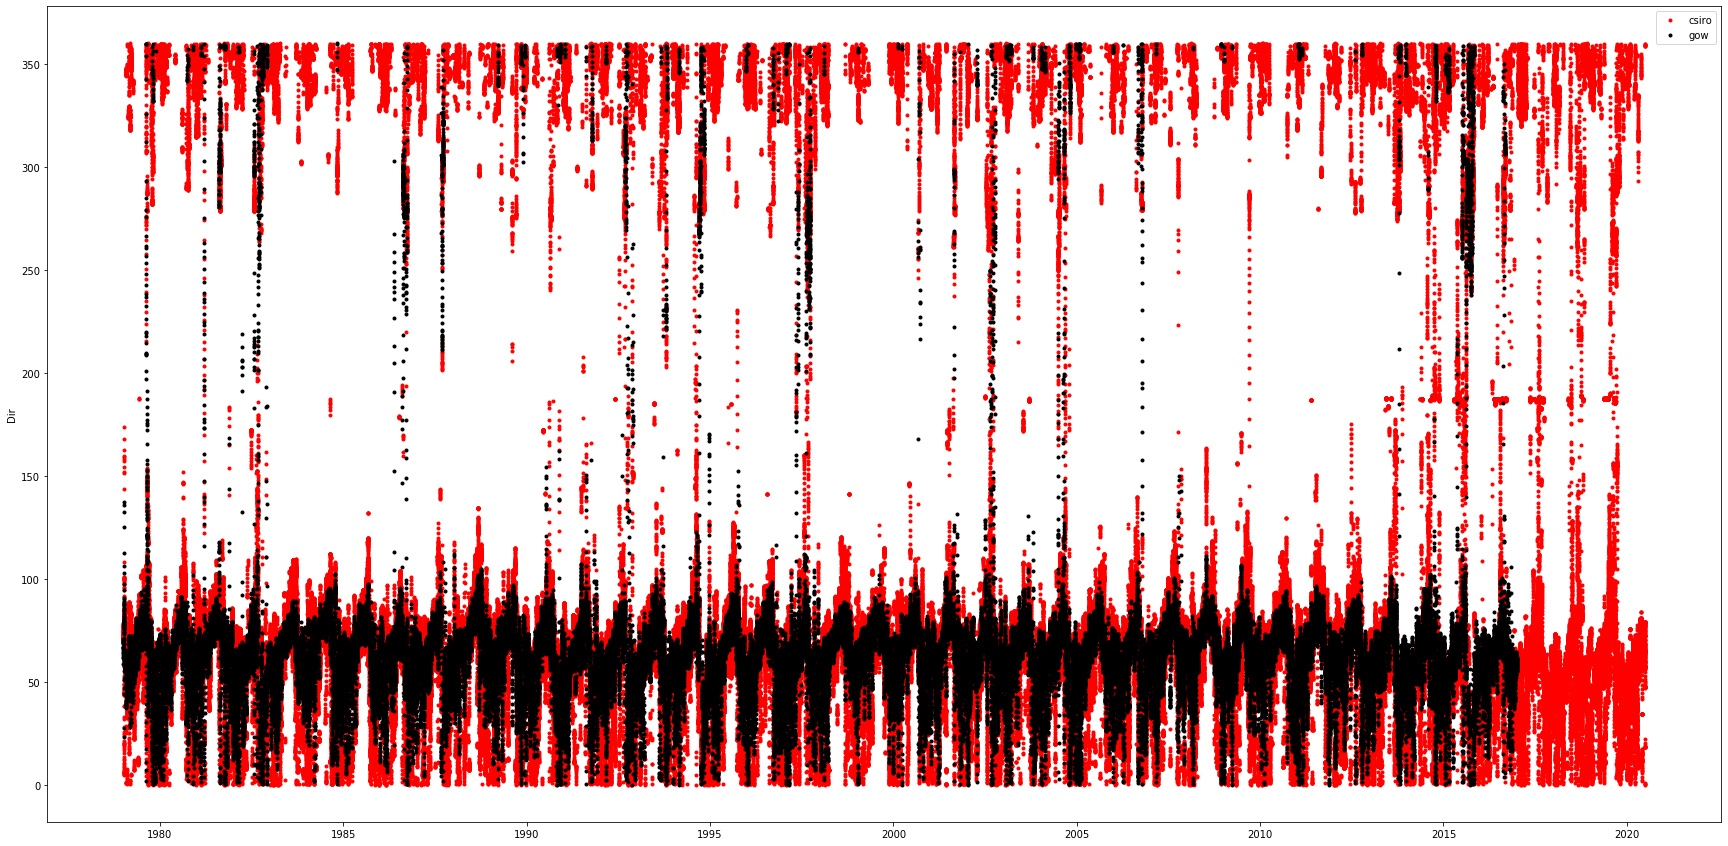

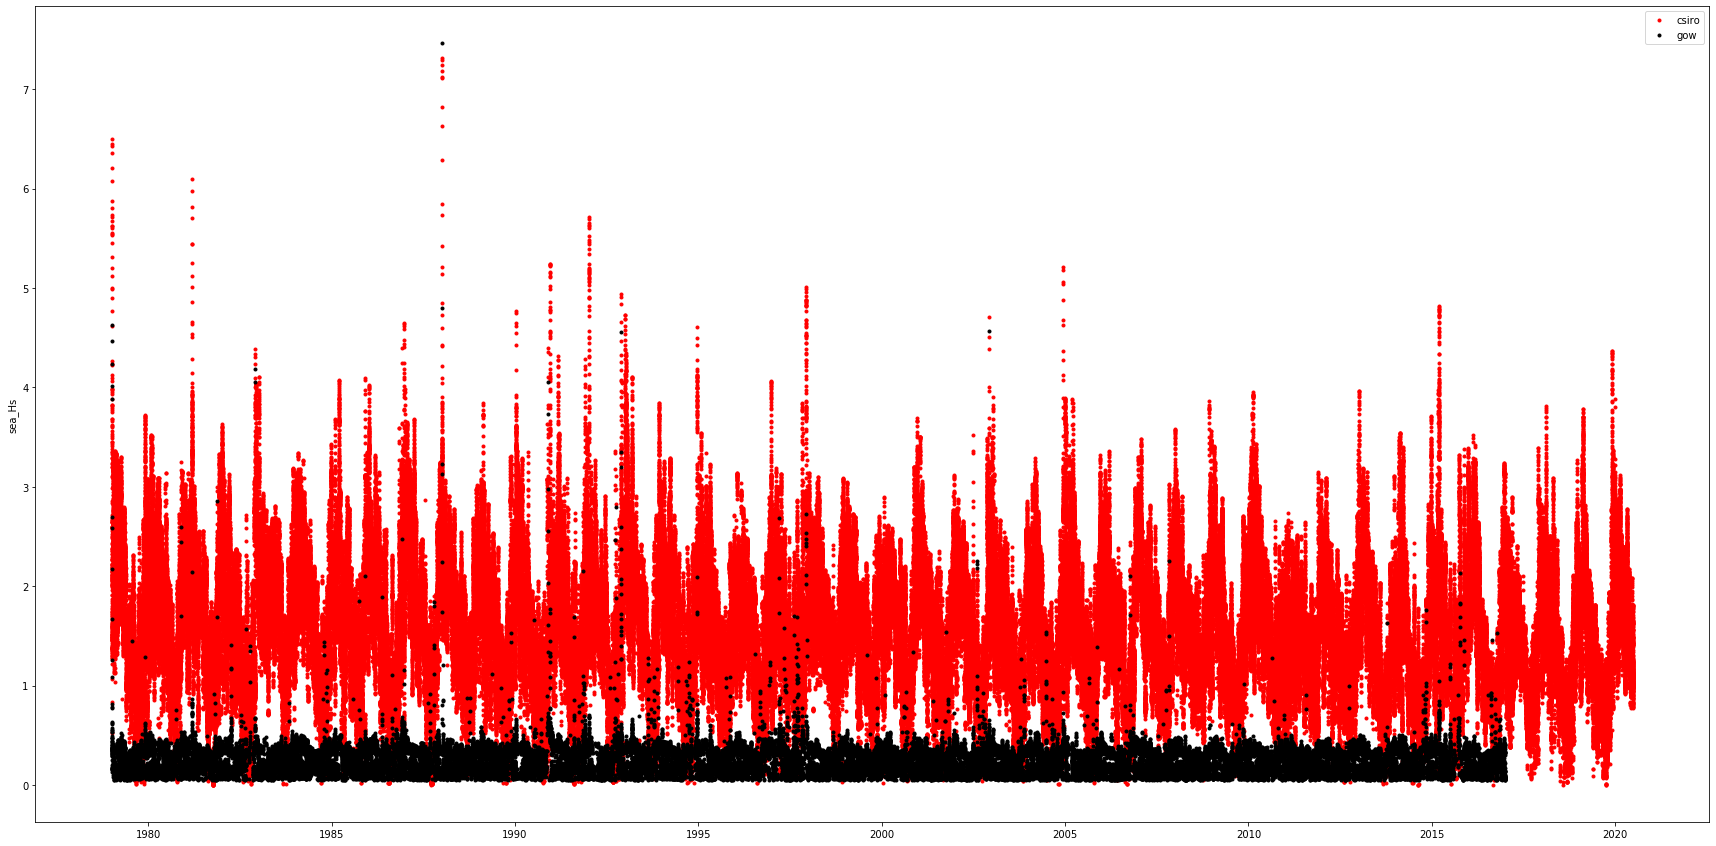

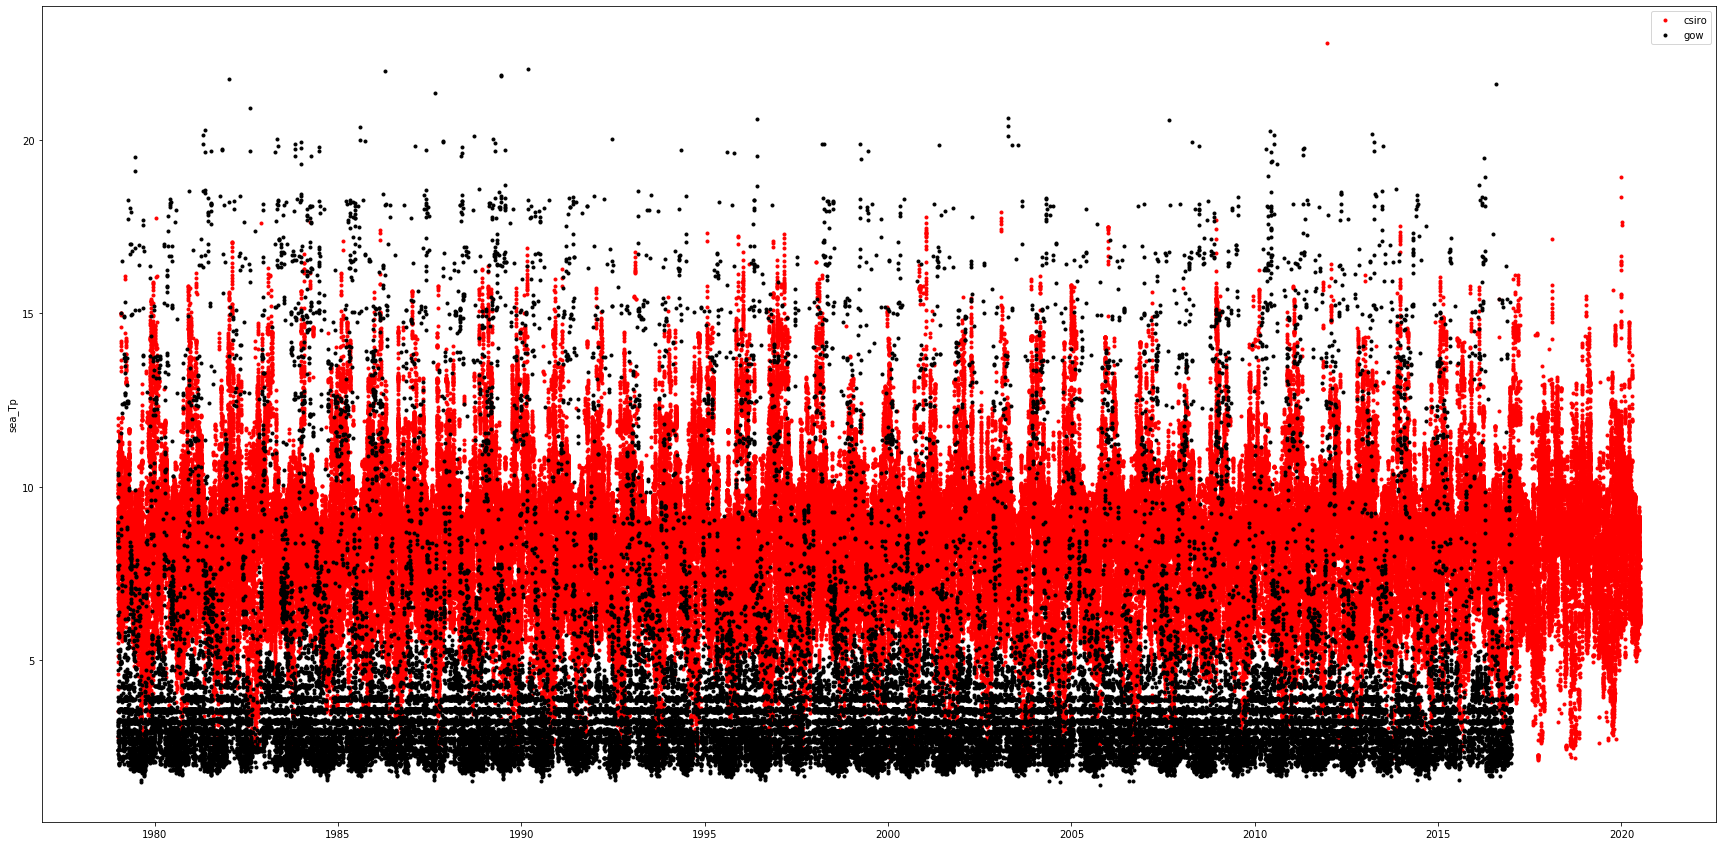

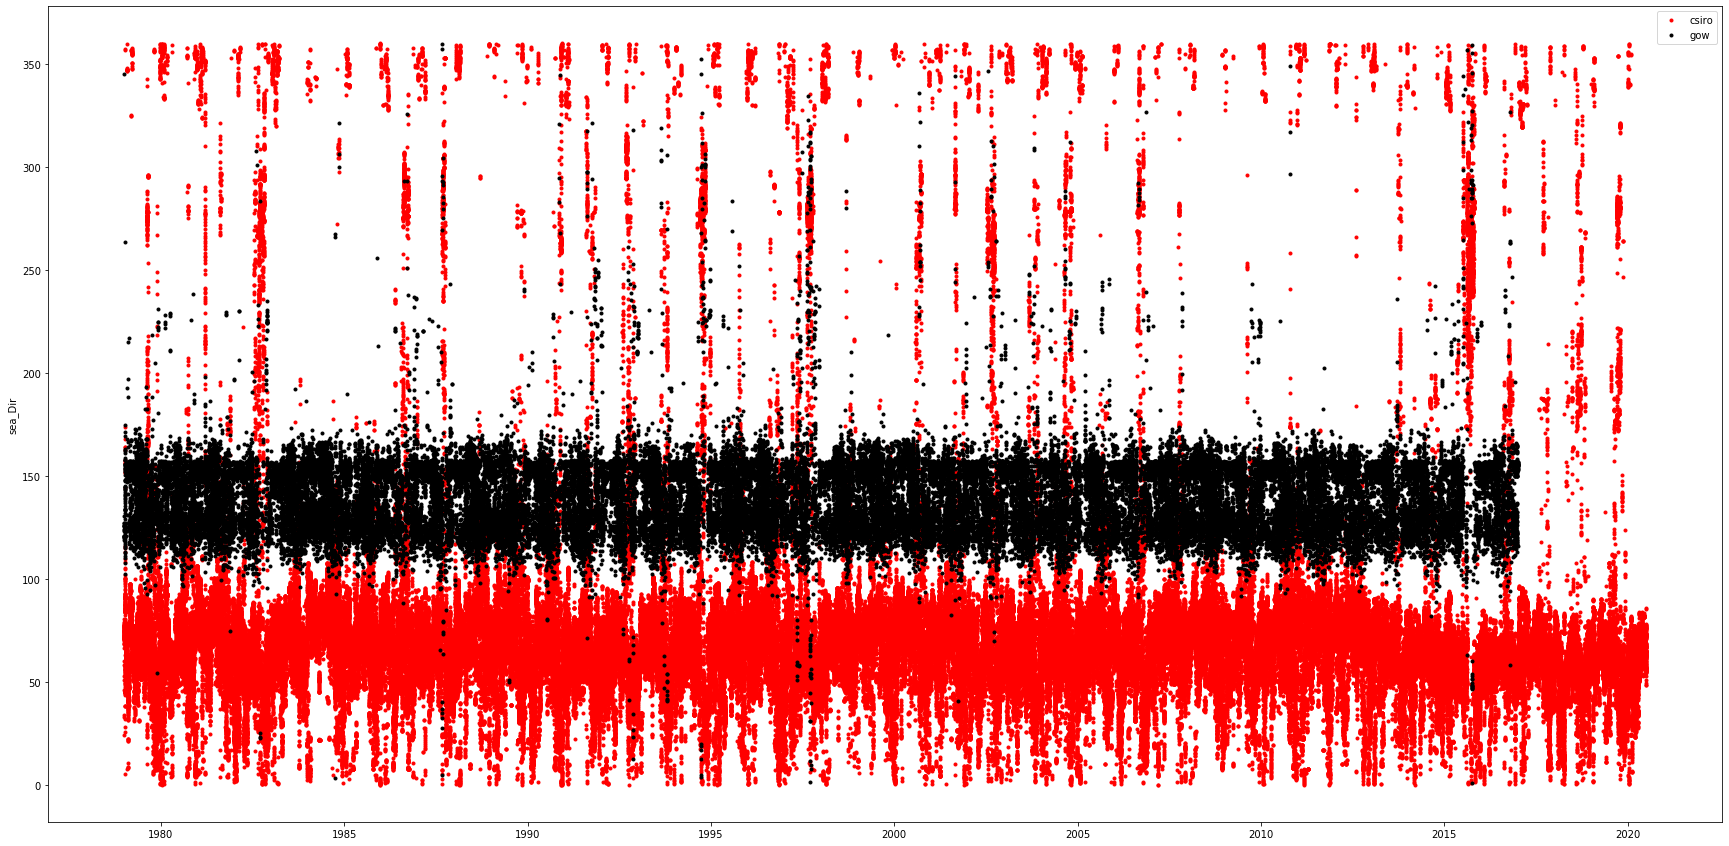

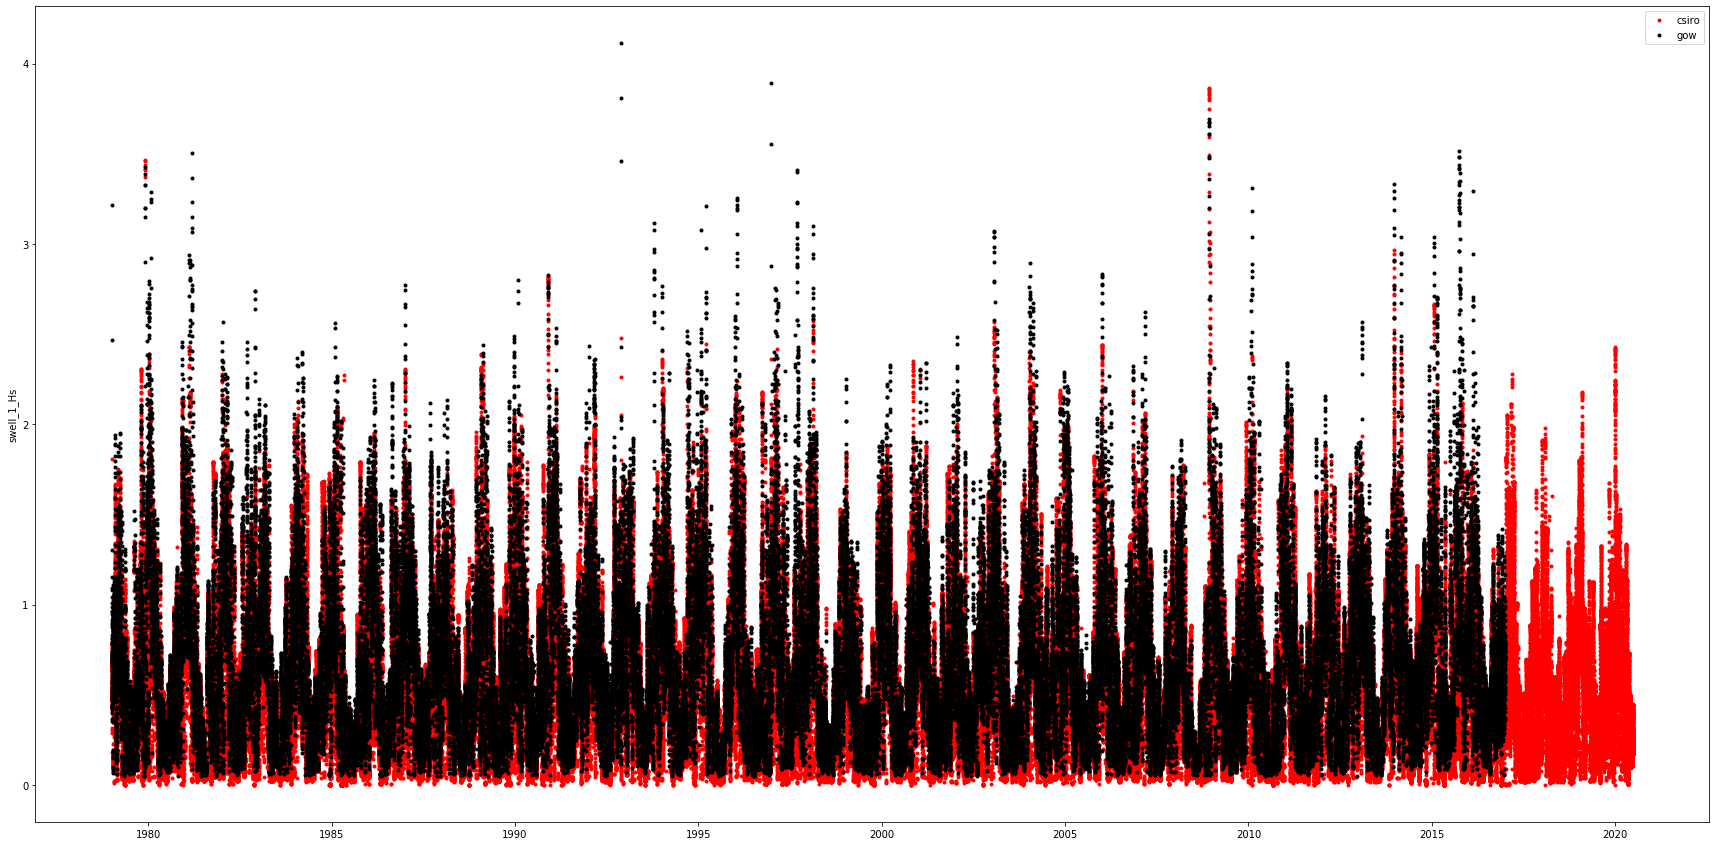

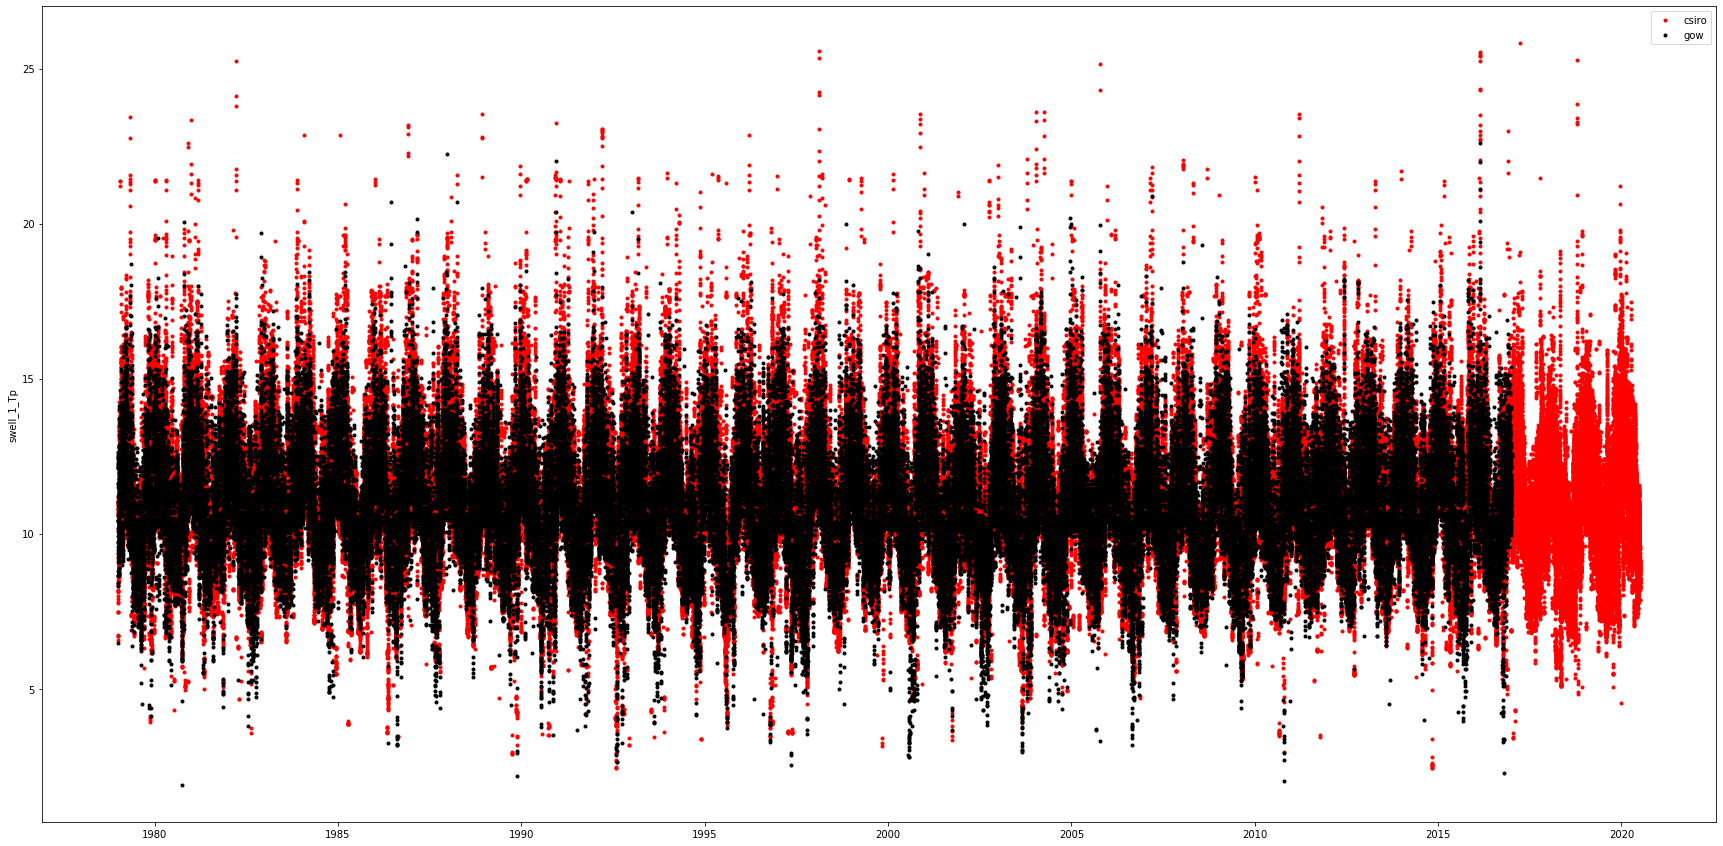

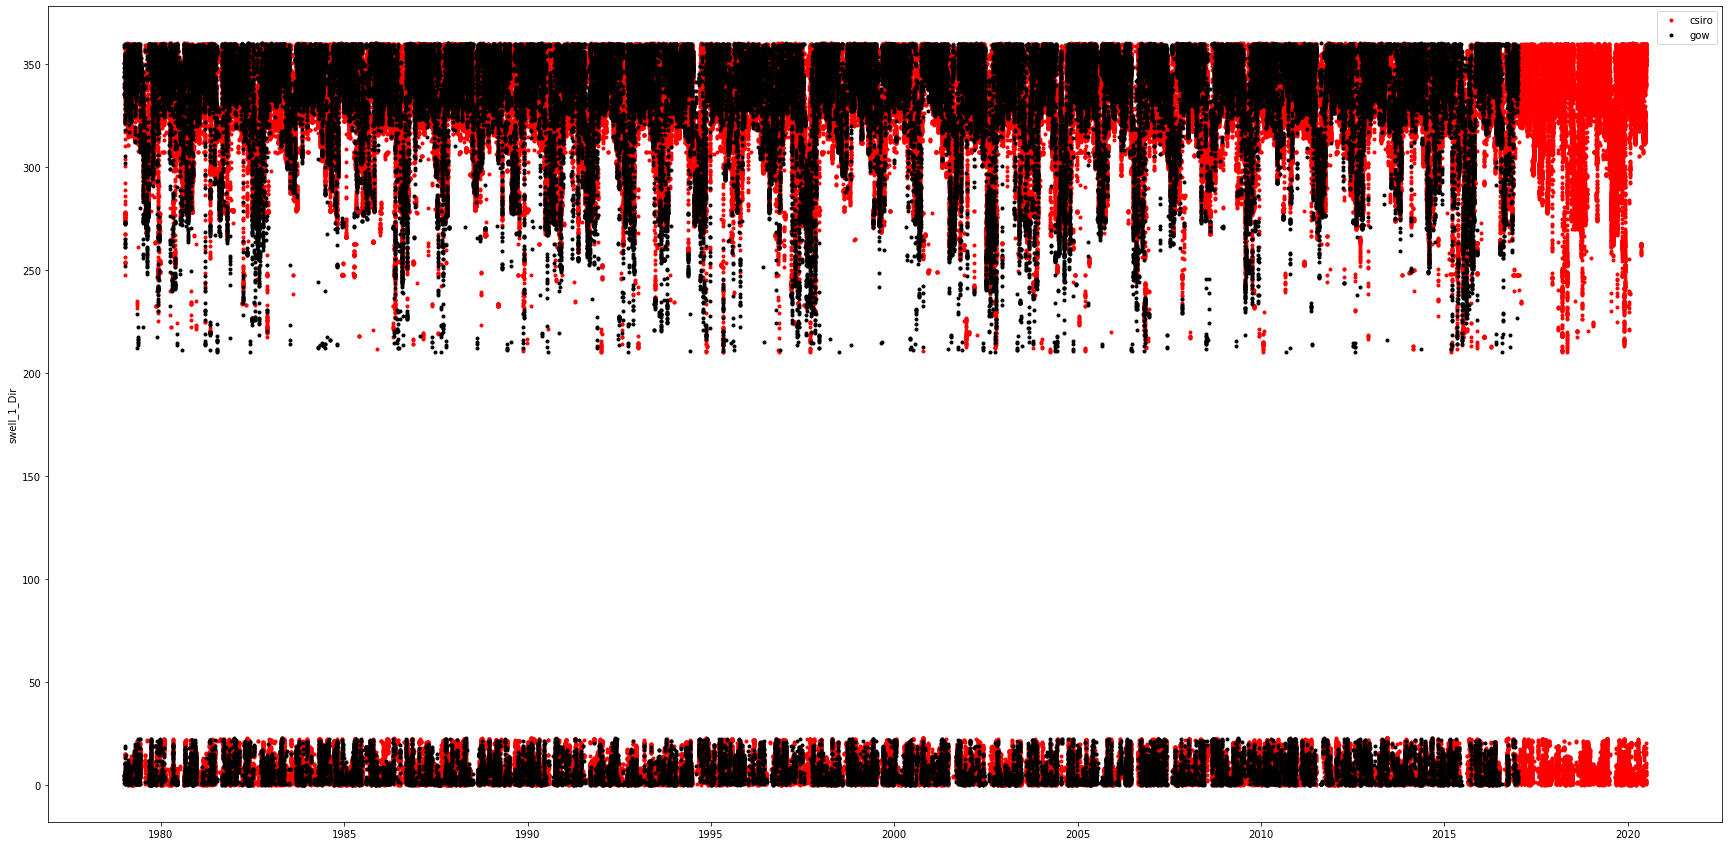

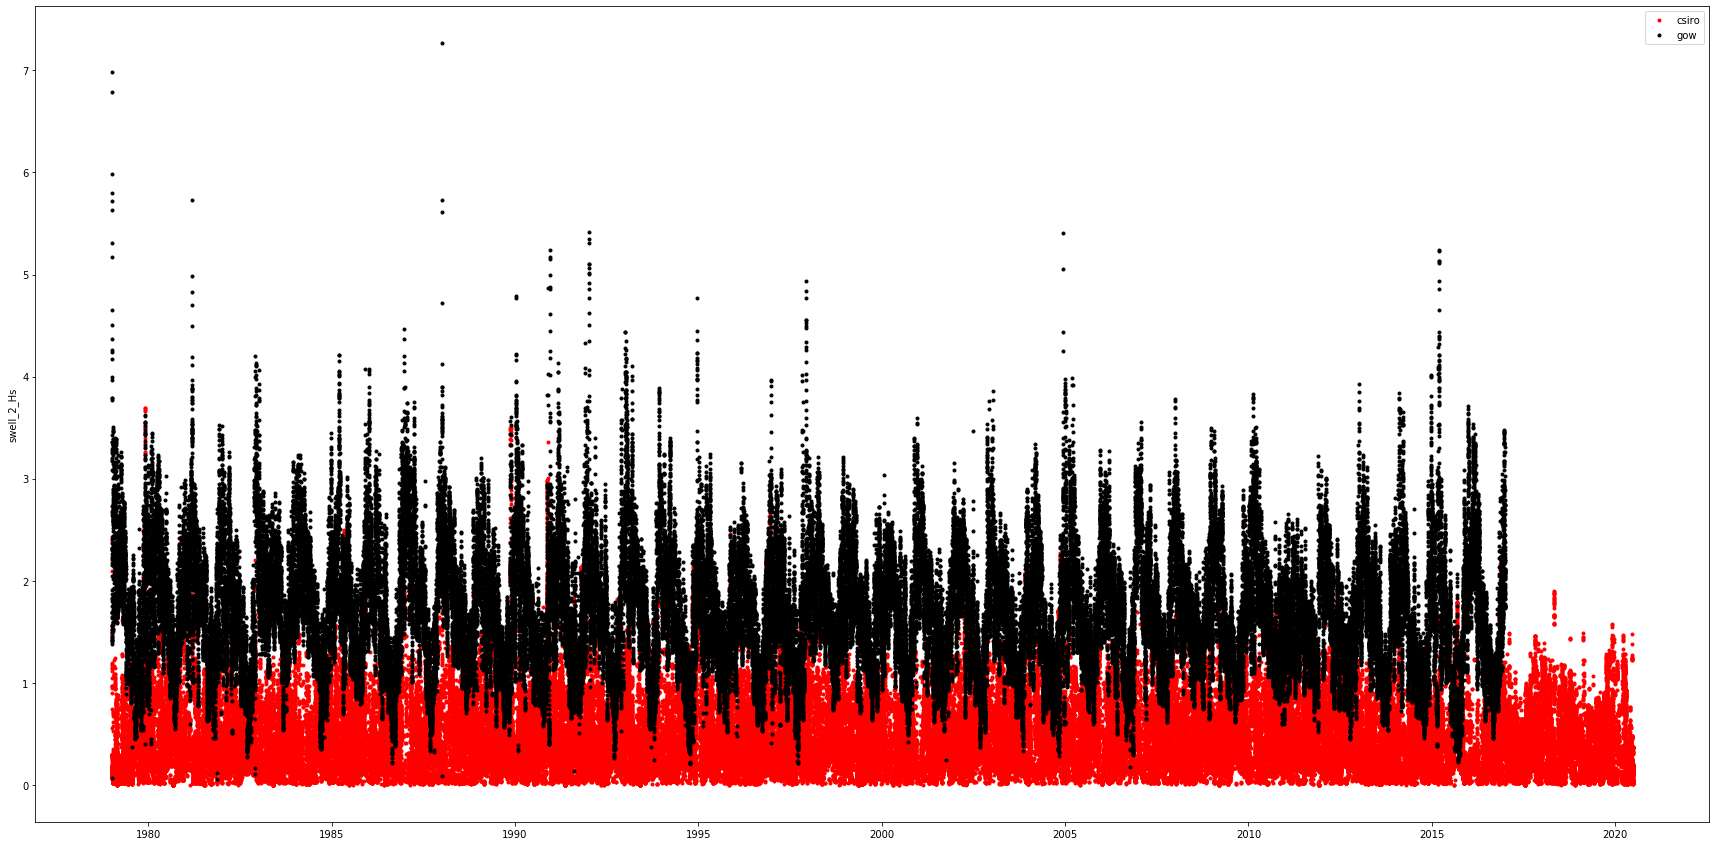

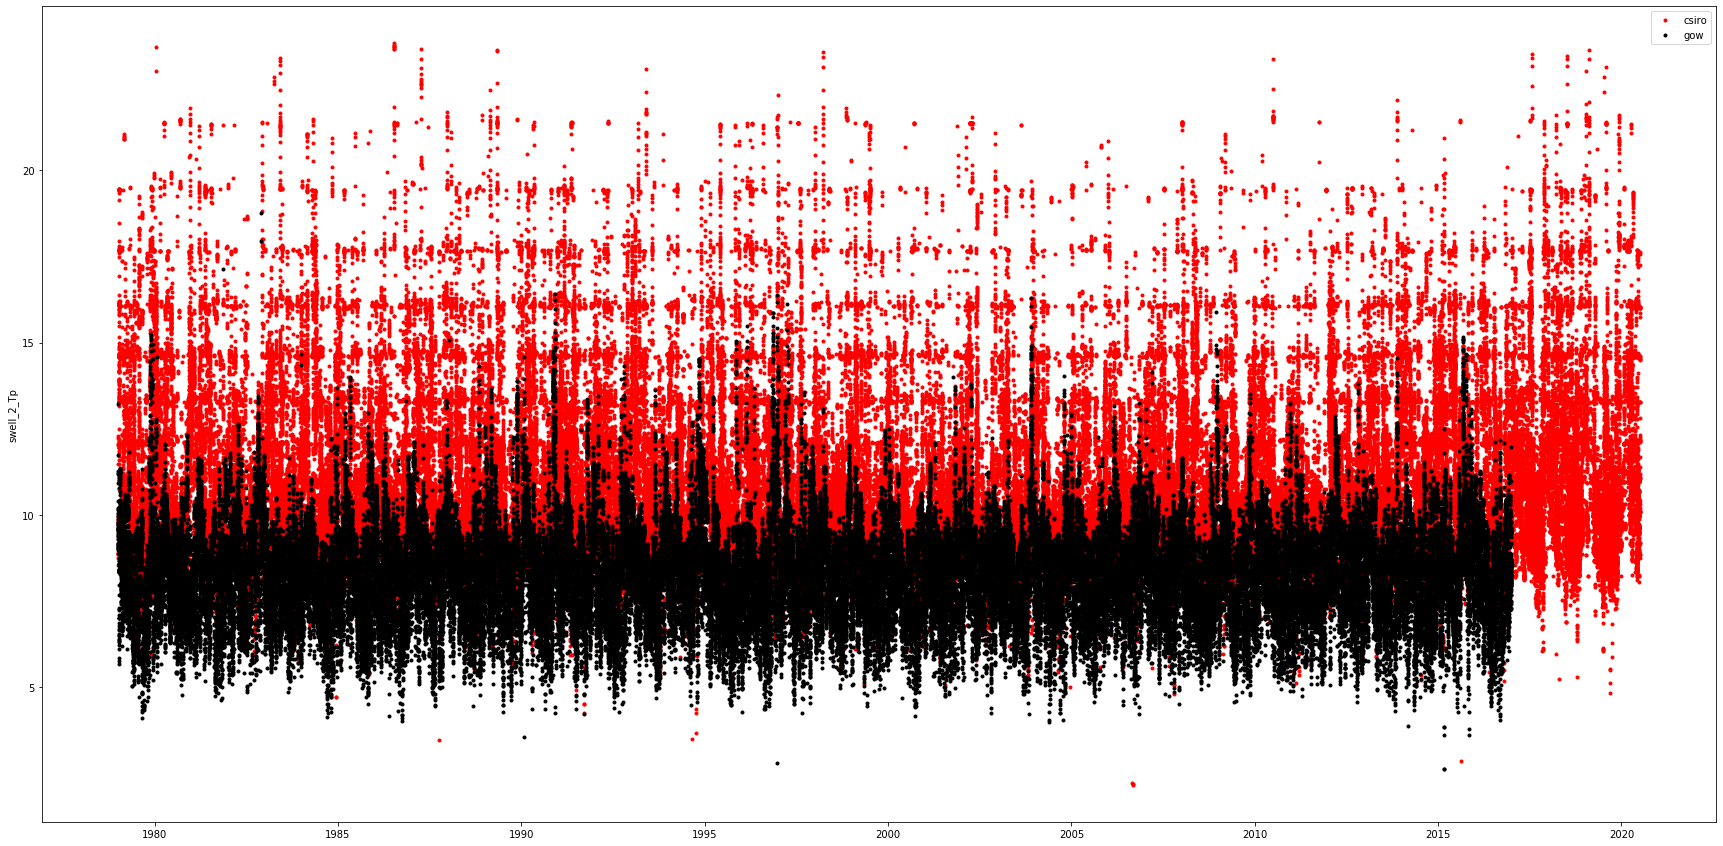

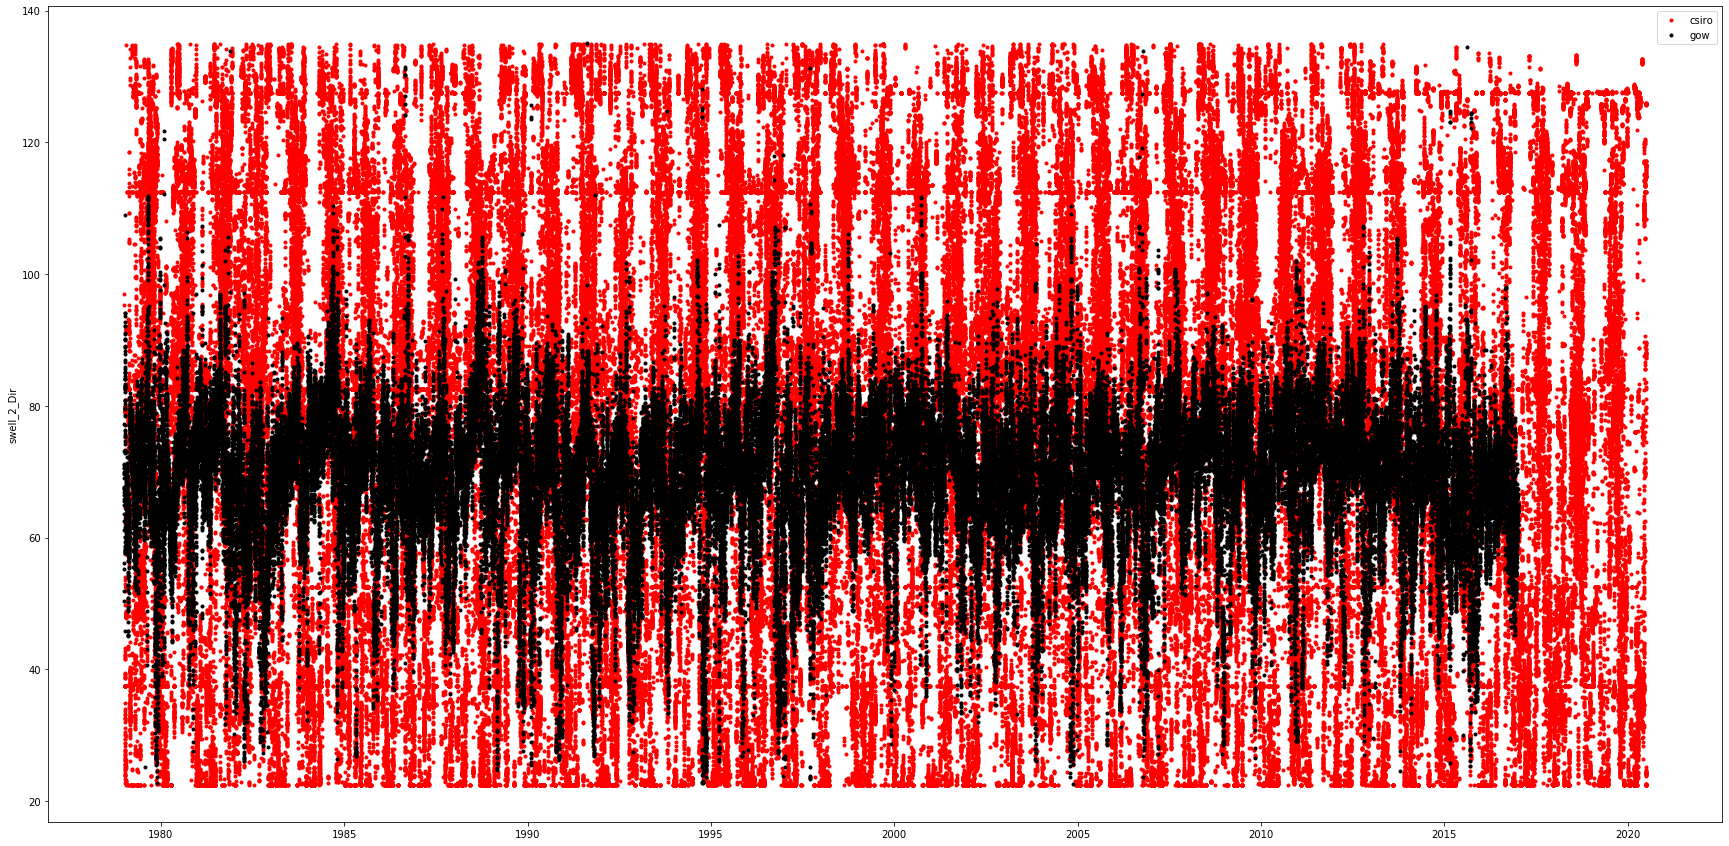

In [3]:

# csiro
WVS_pts = db.Load_WAVES_partitions()       # waves partitions data (from CSIRO spectra and wavespectra toolbox)
WVS_csiro = GetDistribution_ws(WVS_pts, fams_sectors, n_partitions=8)

WVS_csiro['Hs'] = WVS_pts['Hs']
WVS_csiro['Tp'] = WVS_pts['Tp']
WVS_csiro['Dir'] = WVS_pts['Dir']


# gow
WVS_pts = db.Load_WAVES_partitions_GOW()  # waves partitions data (GOW)
WVS_gow = GetDistribution_gow(WVS_pts, fams_sectors, n_partitions=5)

WVS_gow['Hs'] = WVS_pts['hs']
WVS_gow['Tp'] = WVS_pts['tp']
WVS_gow['Dir'] = WVS_pts['dir']

import matplotlib.pyplot as plt

for vn in ['Hs', 'Tp', 'Dir', 'sea_Hs', 'sea_Tp', 'sea_Dir', 'swell_1_Hs', 'swell_1_Tp', 'swell_1_Dir', 'swell_2_Hs', 'swell_2_Tp', 'swell_2_Dir']:

    plt.figure(figsize=(30,15))
    plt.plot(WVS_csiro.time, WVS_csiro[vn], '.r', label='csiro')
    plt.plot(WVS_gow.time, WVS_gow[vn], '.k', label='gow')
    plt.ylabel(vn)
    plt.legend()